<a href="https://colab.research.google.com/github/CJG84/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [3]:
##### Begin Working Here ######

import pandas as pd

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data')

data.sample(5)

,?,C,A,08,00,?.1,S,?.2,000,?.3,?.4,G,?.5,?.6,?.7,?.8,?.9,?.10,?.11,?.12,?.13,?.14,?.15,?.16,?.17,?.18,?.19,?.20,?.21,?.22,?.23,COIL,0.700,0610.0,0000,?.24,0000.1,?.25,3
243,?,C,V,0,0,?,S,2,0,?,?,?,1,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,0.699,609.9,0,?,0,?,3
702,TN,C,A,0,0,?,?,3,0,N,?,?,?,?,?,?,B,?,?,?,?,?,?,?,Y,?,?,?,?,?,?,SHEET,1.600,610.0,762,?,0,?,5
273,?,C,A,0,0,?,S,2,0,?,?,F,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,SHEET,0.700,1220.0,762,?,0,?,3
332,ZS,C,R,0,0,?,S,3,0,?,?,E,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,1.600,1220.0,0,?,0,3,3
527,?,C,W,0,0,?,?,?,310,?,?,G,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,2.501,600.1,0,?,0,?,3


In [6]:
data.shape

(797, 39)

In [9]:
#describing the Coil and G columns
data[['COIL', 'G']].describe()

,COIL,G
count,797,797
unique,2,5
top,SHEET,E
freq,431,278


In [11]:
data.dtypes

?          object
C          object
A          object
08          int64
00          int64
?.1        object
S          object
?.2        object
000         int64
?.3        object
?.4        object
G          object
?.5        object
?.6        object
?.7        object
?.8        object
?.9        object
?.10       object
?.11       object
?.12       object
?.13       object
?.14       object
?.15       object
?.16       object
?.17       object
?.18       object
?.19       object
?.20       object
?.21       object
?.22       object
?.23       object
COIL       object
0.700     float64
0610.0    float64
0000        int64
?.24       object
0000.1      int64
?.25       object
3          object
dtype: object

In [12]:
#we set rows limit to 100 wheras above it showed all rows.  
pd.set_option('display.max_rows', 100)
data.dtypes

?          object
C          object
A          object
08          int64
00          int64
?.1        object
S          object
?.2        object
000         int64
?.3        object
?.4        object
G          object
?.5        object
?.6        object
?.7        object
?.8        object
?.9        object
?.10       object
?.11       object
?.12       object
?.13       object
?.14       object
?.15       object
?.16       object
?.17       object
?.18       object
?.19       object
?.20       object
?.21       object
?.22       object
?.23       object
COIL       object
0.700     float64
0610.0    float64
0000        int64
?.24       object
0000.1      int64
?.25       object
3          object
dtype: object

In [13]:
#the data type is an integer (64 bit)
data['0000'].dtype

dtype('int64')

In [15]:
#we sampled from two colums
data[['0000', 'A']].sample(4)

,0000,A
348,4880,?
722,0,A
162,0,A
398,612,R


In [16]:
# we see these are floats
data['0.700'].head()

0    3.200
1    0.700
2    2.801
3    0.801
4    1.600
Name: 0.700, dtype: float64

In [18]:
data['0.700'].value_counts(dropna=False)

0.700    81
0.600    79
0.699    76
1.600    75
0.800    64
3.200    48
0.300    41
1.200    35
0.400    31
1.599    29
1.000    29
0.601    18
2.000    17
0.500    15
2.500    13
4.000    12
0.799    11
0.301    10
1.601     9
3.201     9
1.201     9
0.900     8
0.801     7
2.300     7
1.500     6
1.090     5
0.599     5
1.001     5
2.801     4
0.999     4
3.500     3
2.200     3
0.451     3
0.321     3
1.399     2
1.300     2
1.299     2
1.400     2
1.100     2
0.750     2
0.901     2
2.501     2
0.501     1
0.651     1
3.000     1
0.250     1
1.900     1
2.800     1
3.300     1
Name: 0.700, dtype: int64

In [19]:
import numpy as np
np.nan

nan

In [20]:
#we have confirmed Nan is a float
type(np.nan)

float

In [24]:
#it is showing up as no missing data however we know a bunch of values are ? which we would convert to float with replace
data.isnull().sum()

?         0
C         0
A         0
08        0
00        0
?.1       0
S         0
?.2       0
000       0
?.3       0
?.4       0
G         0
?.5       0
?.6       0
?.7       0
?.8       0
?.9       0
?.10      0
?.11      0
?.12      0
?.13      0
?.14      0
?.15      0
?.16      0
?.17      0
?.18      0
?.19      0
?.20      0
?.21      0
?.22      0
?.23      0
COIL      0
0.700     0
0610.0    0
0000      0
?.24      0
0000.1    0
?.25      0
3         0
dtype: int64

In [0]:
#this is the code I would use if I need to drop NaN's from it
data.dropna(inplace=True)

In [26]:
data.head()

,?,C,A,08,00,?.1,S,?.2,000,?.3,?.4,G,?.5,?.6,?.7,?.8,?.9,?.10,?.11,?.12,?.13,?.14,?.15,?.16,?.17,?.18,?.19,?.20,?.21,?.22,?.23,COIL,0.700,0610.0,0000,?.24,0000.1,?.25,3
0,?,C,R,0,0,?,S,2,0,?,?,E,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,Y,?,?,?,COIL,3.200,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,?,E,?,?,Y,?,B,?,?,?,?,?,?,?,?,?,?,?,?,?,?,SHEET,0.700,1300.0,762,?,0,?,3
2,?,C,A,0,60,T,?,?,0,?,?,G,?,?,?,?,M,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,2.801,385.1,0,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,?,G,?,?,?,?,B,Y,?,?,?,Y,?,?,?,?,?,?,?,?,?,SHEET,0.801,255.0,269,?,0,?,3
4,?,C,A,0,45,?,S,?,0,?,?,D,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,1.600,610.0,0,?,0,?,3


In [32]:
#we have transferred the large data set into a smaller one
sub = data[['COIL', '0.700', '0610.0']].copy()
sub.sample(6)

,COIL,0.700,0610.0
773,SHEET,0.700,610.0
584,COIL,3.200,610.0
193,COIL,3.200,1320.0
577,COIL,0.601,610.0
416,COIL,0.699,1320.0
746,SHEET,0.700,150.0


In [33]:
#we created a new column Sum whihc is the addition of .700 and .610
sub['Sum'] = sub['0.700'] + sub['0610.0']
sub.head()

,COIL,0.700,0610.0,Sum
0,COIL,3.200,610.0,613.200
1,SHEET,0.700,1300.0,1300.700
2,COIL,2.801,385.1,387.901
3,SHEET,0.801,255.0,255.801
4,COIL,1.600,610.0,611.600


In [37]:
#created multilplier column
sub['multiplier'] = sub['0.700'] * sub['0610.0']
sub.head()

,COIL,0.700,0610.0,Sum,multiplier
0,COIL,3.200,610.0,613.200,1952.0000
1,SHEET,0.700,1300.0,1300.700,910.0000
2,COIL,2.801,385.1,387.901,1078.6651
3,SHEET,0.801,255.0,255.801,204.2550
4,COIL,1.600,610.0,611.600,976.0000


In [40]:
#categorcal variables
data[['COIL', "A", "C"]].sample(5)

,COIL,A,C
541,COIL,K,C
332,COIL,R,C
463,SHEET,R,C
671,COIL,?,C
619,SHEET,A,C


In [41]:
data['COIL'].value_counts()

SHEET    431
COIL     366
Name: COIL, dtype: int64

In [45]:
# new categorical variables, how many tims COIL is sheet
data['Nomrmal'] = np.where(data['COIL']=='SHEET', 'yes', 'notSheet')
data['Nomrmal'].value_counts()

yes         431
notSheet    366
Name: Nomrmal, dtype: int64

In [46]:
data['A'].value_counts()

A    396
R    231
?     70
K     44
M     17
W     17
V     13
S      9
Name: A, dtype: int64

In [49]:
data['A_22'] = data['A'].map({"A": "ff",
                              'M': "dd"})
data['A_22'].value_counts()


ff    396
dd     17
Name: A_22, dtype: int64

In [50]:
data.head()

,?,C,A,08,00,?.1,S,?.2,000,?.3,?.4,G,?.5,?.6,?.7,?.8,?.9,?.10,?.11,?.12,?.13,?.14,?.15,?.16,?.17,?.18,?.19,?.20,?.21,?.22,?.23,COIL,0.700,0610.0,0000,?.24,0000.1,?.25,3,Nomrmal,A_22
0,?,C,R,0,0,?,S,2,0,?,?,E,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,Y,?,?,?,COIL,3.200,610.0,0,?,0,?,3,notSheet,NaN
1,?,C,R,0,0,?,S,2,0,?,?,E,?,?,Y,?,B,?,?,?,?,?,?,?,?,?,?,?,?,?,?,SHEET,0.700,1300.0,762,?,0,?,3,yes,NaN
2,?,C,A,0,60,T,?,?,0,?,?,G,?,?,?,?,M,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,2.801,385.1,0,?,0,?,3,notSheet,ff
3,?,C,A,0,60,T,?,?,0,?,?,G,?,?,?,?,B,Y,?,?,?,Y,?,?,?,?,?,?,?,?,?,SHEET,0.801,255.0,269,?,0,?,3,yes,ff
4,?,C,A,0,45,?,S,?,0,?,?,D,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,1.600,610.0,0,?,0,?,3,notSheet,ff


In [51]:
data['COIL'].value_counts()

SHEET    431
COIL     366
Name: COIL, dtype: int64

In [52]:
data['new_v'] = 'All others'
data[['new_v', 'G']].head()

,new_v,G
0,All others,E
1,All others,E
2,All others,G
3,All others,G
4,All others,D


In [57]:
data.loc[data['G'] == "E", "new_v"] = 'new_stuff'
data[['new_v', 'G']].head()

,new_v,G
0,new_stuff,E
1,new_stuff,E
2,All others,G
3,All others,G
4,All others,D


In [60]:
#crosstabing our work
pd.crosstab(data['new_v'], data['G'])

G,?,D,E,F,G
new_v,,,,,
All others,217,50,0,53,199
new_stuff,0,0,278,0,0


In [61]:
#added margins
pd.crosstab(data['new_v'], data['G'], margins=True)

G,?,D,E,F,G,All
new_v,,,,,,
All others,217,50,0,53,199,519
new_stuff,0,0,278,0,0,278
All,217,50,278,53,199,797


In [63]:
#as proportions
pd.crosstab(data['new_v'], data['G'], normalize= 'index', margins=True)

G,?,D,E,F,G
new_v,,,,,
All others,0.418112,0.096339,0.000000,0.102119,0.383430
new_stuff,0.000000,0.000000,1.000000,0.000000,0.000000
All,0.272271,0.062735,0.348808,0.066499,0.249686


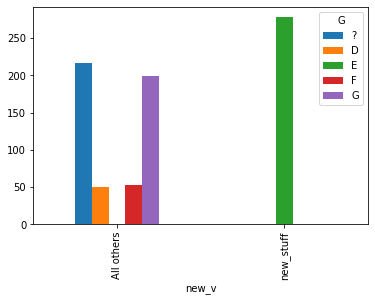

In [66]:
my_res = pd.crosstab(data['new_v'], data['G'])
my_res.plot(kind='bar')

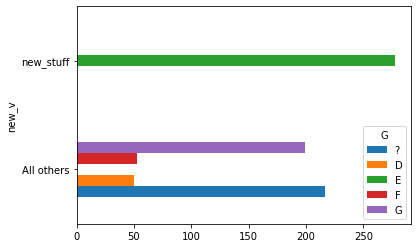

In [67]:
my_res.plot(kind='barh')

In [69]:
! wget ! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip


--2020-05-09 02:30:13--  http://!/
Resolving ! (!)... failed: Name or service not known.
wget: unable to resolve host address ‘!’
--2020-05-09 02:30:13--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2020-05-09 02:30:13--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 52.89.126.95, 54.201.144.36, 44.225.46.60
Connecting to resources.lendingclub.com (resources.lendingclub.com)|52.89.126.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [            <=>     ]  22.05M  1.83MB/s    in 12s     

2020-05-09 02:30:25 (1.92 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23121687]

FINISHED --2020-05-09 02:30:25--
Total wall clock time: 12s
Downloaded: 1 files, 22M in 12s (1.92 MB/s)


In [70]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [74]:
ld = pd.read_csv('LoanStats_2018Q4.csv');
ld.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title             emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       10000     10000       10000            60 months  16.14%  243.93      C     C4        Sale Consultant       2 years    RENT           90000      Not Verified        Dec-2018 Fully Paid  n          NaN NaN  debt_consolidation Debt consolidation      079xx    NJ         8.8   0           Mar-1991         1              NaN                    43                     11       1       10582     58.5%      32        w                   0.00      0.00          10661.0577272374 10661.06        10000.00        661.06        0.0                0.0        0.0                     May-2019     9698.79         NaN          Dec-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            15470       1           1           0           1           18                 4888         65      1           3           2969       60       18100            2      0           2            4                    1719        4906           67.3    0                        0           133                333                  2                     2              1        2                    NaN                      1                     NaN                            0                     4              6               5           15        6         8             23            6                   11       0                0            0                  1                  100            80   

In [76]:
# we eliminated the the final column at the top and the two and the two at the bottom
ld = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2);
ld.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,...,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4066.26,4066.26,3222.810000,3222.81,...,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,...,0.0,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,0.00,0.00,5848.050000,5848.05,...,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,25780.25,25780.25,13745.470000,13745.47,...,0.0,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
ld.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,5557.25,5557.25,6233.34,6233.34,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,2751.79,2751.79,3053.17,3053.17,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5411.74,5276.45,5882.88,5735.81,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,5626.39,5626.39,6400.05,6400.05,...,0.0,0,0,73669,59194,4000,67369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
#sum values sorted
pd.set_option('display.max_rows', 750)
ld.isnull().sum().sort_values(ascending=False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
settlement_percentage                         127661
settlement_term                               127661
settlement_date                               127661
debt_settlement_flag_date                     127661
settlement_status                             127661
settlement_amount                             127661
sec_app_mths_since_last_major_derog           123258
hardship_loan_status                          117705
hardship_status                               117691
hardship_reason                               117691
hardship_dpd                                  117690
hardship_length                               117690
payment_plan_start_date                       117690
hardship_end_date                             117690
hardship_start_date                           

In [0]:
#drop columns made up on Nan values
ld.drop('url', axis=1,inplace=True)

In [90]:
#dropped URL column
ld.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,10000.00,...,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4066.26,4066.26,3222.810000,3222.81,2433.74,...,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,4500.00,...,0.0,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Charged Off,n,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,0.00,0.00,5848.050000,5848.05,3024.11,...,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,25780.25,25780.25,13745.470000,13745.47,4219.75,...,0.0,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
ld['int_rate'].head(10)

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
5     16.14%
6     12.98%
7     12.98%
8     10.33%
9     23.40%
Name: int_rate, dtype: object

In [94]:
#specific value from column...its a string
ld['int_rate'][4]

' 27.27%'

In [96]:
#fixing int_rate from string to int...removed space
int_r = ' 27.27%'

int_r.strip()

'27.27%'

In [97]:
#removing percent sign and % and  convertign to float
int_r.strip('%').strip()

'27.27'

In [98]:
float(int_r.strip('%').strip())

27.27

In [0]:
def myFunk(cell_contents):
    return float(cell_contents.strip().strip('%'))
 

In [111]:
type(myFunk(int_r))

float

In [114]:
list = []
for cell in ld['int_r']:
  list.append(myFunk(cell))

list[:9]

KeyError: ignored

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01